<a href="https://colab.research.google.com/github/FARTASH-421/Main/blob/FARTASH-421-patch-1/MyPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# for test loadding data

df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [18]:
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, Mydf):
        Mydf = Mydf.copy()

        # Compute the arithmetic mean along the specified axis.
        # self.mean = M =1/N [X1+ X2+ X3+...+Xn]
        self.mean = np.mean(Mydf, axis = 0)


        # Compute the standard deviation along the specified axis.
        # X^ = Xi-M
        # self.scale = B = [X1^,....., Xn^]
        self.scale = np.std(Mydf, axis = 0)
        df_std = (Mydf - self.mean) / self.scale
        
        # cov_mat is count Estimate a covariance matrix, given data and weights.
        cov_mat = np.cov(df_std.T)

        # Compute the eigenvalues and right eigenvectors of a square array.
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

        # Returns the indices of the maximum values along an axis.
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)

        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, Mydf):
        Mydf= Mydf.copy()
        df_std = (Mydf - self.mean) / self.scale
        X_proj = df_std.dot(self.components.T)
        
        return X_proj



In [19]:
my_pca = MyPCA(n_components = 2)
my_pca.fit(scaled_data)
print(scaled_data.shape)
X_proj = my_pca.transform(scaled_data)
print(X_proj.shape)

(569, 30)
(569, 2)


In [20]:
print(my_pca.components)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


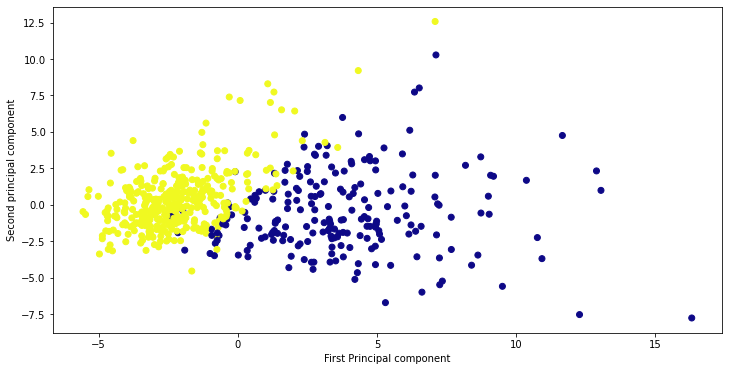

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(X_proj[:,0], X_proj[:,1],c=data['target'], cmap='plasma')
plt.xlabel('First Principal component')
plt.ylabel('Second principal component')
plt.show()

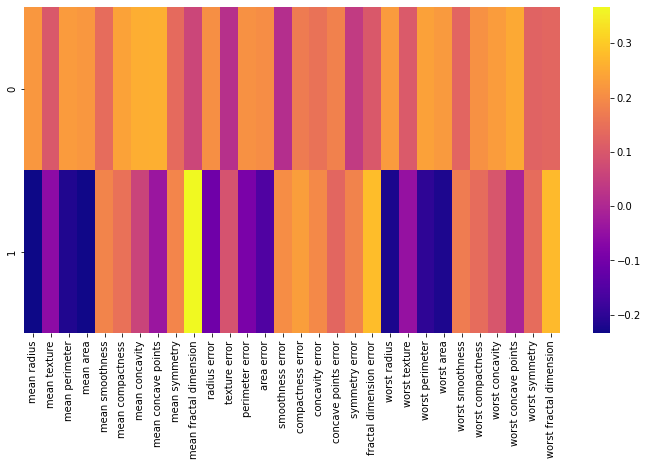

In [17]:
df_comp = pd.DataFrame(my_pca.components, columns=data['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [11]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
# print(pac.components_)
print(x_pca.shape)

(569, 30)
(569, 2)


In [12]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

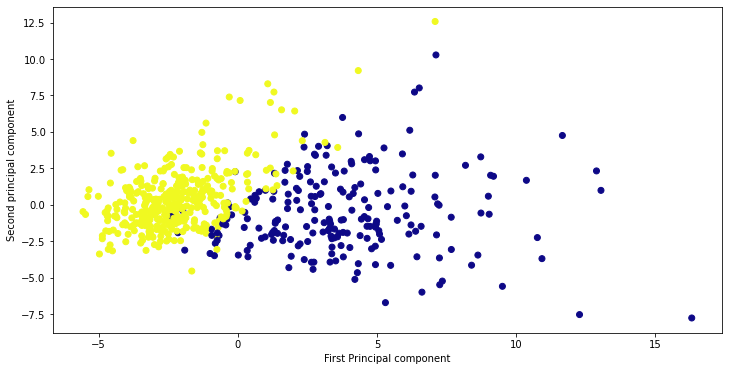

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c=data['target'], cmap='plasma')
plt.xlabel('First Principal component')
plt.ylabel('Second principal component')
plt.show()

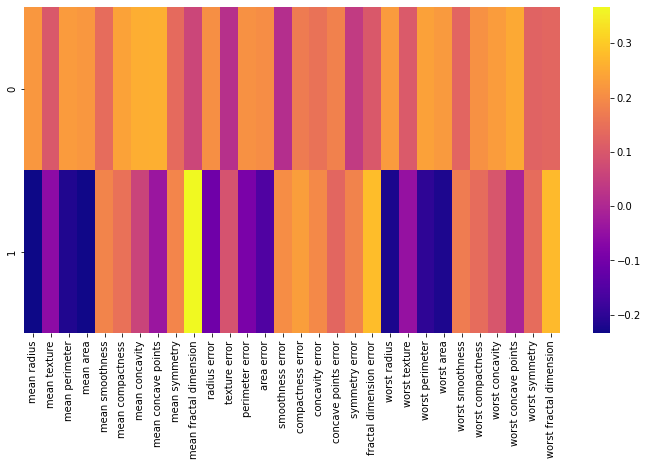

In [14]:
df_comp = pd.DataFrame(my_pca.components, columns=data['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')